<a href="https://colab.research.google.com/github/sonali6062/Deep-Learning/blob/main/Creating_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # Import the numpy library for numerical operations
import pandas as pd # Import the pandas library for data manipulation
import tensorflow # Import the tensorflow library for building and training neural networks

In [2]:
pip install tensorflow # Install the tensorflow library

In [3]:
from tensorflow.keras.datasets import mnist ##import dataset # Import the MNIST dataset from Keras datasets

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()# Load the MNIST dataset into training and testing sets

In [5]:
x_train=x_train/255 # Normalize the training data by dividing by 255
x_test=x_test/255 # Normalize the testing data by dividing by 255
#normalise the data # Existing comment

In [6]:
y_train# Display the training labels (before one-hot encoding)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)# Convert training labels to one-hot encoding with 10 classes

In [8]:
y_test=to_categorical(y_test,num_classes=10) # Convert testing labels to one-hot encoding with 10 classes

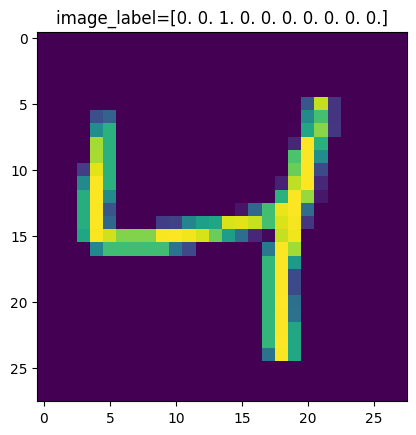

In [9]:
import matplotlib.pyplot as plt # Import matplotlib for plotting
plt.imshow(x_train[2]) # Display the image at index 2 from the training data
plt.title(f"image_label={y_train[5]}") # Set the title of the plot with the label of the image at index 5 (note: this index is different from the image index)
plt.show() # Show the plot

In [10]:
np.unique(y_train)# Check the unique values in the one-hot encoded training labels

array([0., 1.])

In [11]:
from tensorflow.keras.layers import Dense,Flatten # Import Dense and Flatten layers from tensorflow.keras.layers
from tensorflow.keras.models import Sequential # Import the Sequential model from tensorflow.keras.models
from tensorflow.keras.utils import to_categorical # Import to_categorical for one-hot encoding (already imported but good to keep the comment)

In [12]:
model=Sequential([ # Initialize a Sequential model
    Flatten(input_shape=(28,28)),#input layer=28*28 # Flatten the input images from 28x28 to 784 pixels
    Dense(5,activation='relu'),#feed forward network(fully connected)hidden layer with 5 neurons # Add a dense hidden layer with 5 neurons and ReLU activation
    Dense(10,activation='softmax')#output layer with 10 neurons # Add a dense output layer with 10 neurons and Softmax activation for multi-class classification
])
#activation function helps to intoduce non-linearity(allow to perform non-linearlity) # Existing comment
#we use'relu' for hidden layer as the output can be in any pattern # Existing comment
#for binary classification we use sigmoid but as it is multi-class classification we use softmax # Existing comment

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()# Display a summary of the model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

Pram-(784*5)+5(for bias)additional function
Param(dense_3)-(10*5)+10(10 bias for each neuron)
these are trainable parameters

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#metrics-how we'll evaluate our model(at the end we'll look accuracy)
#loss-total loss when 1st attemp for the training all the data
#optimizer-loss for single value

In [15]:
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.7012 - loss: 0.8981
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.8584 - loss: 0.4863
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8766 - loss: 0.4335
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8847 - loss: 0.4048
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8893 - loss: 0.3870


In [16]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8774 - loss: 0.4190


[0.3735148310661316, 0.891700029373169]

In [17]:
model.save('mnist.keras') # Save the trained model to a .keras file
#we can download the file and use for further computation

In [18]:
model.get_weights()

[array([[ 0.07151113,  0.01287311,  0.02628703,  0.08443178,  0.00460171],
        [ 0.02440697,  0.01944727, -0.01548892,  0.02881056, -0.01379545],
        [ 0.01419553,  0.05218919, -0.00071432,  0.08287661, -0.08166394],
        ...,
        [-0.07055084,  0.01048025,  0.05021663, -0.00569911,  0.06212425],
        [-0.05243051, -0.02000273, -0.0598181 , -0.00511406,  0.02768878],
        [ 0.02766292,  0.06472072, -0.06971965, -0.03767628, -0.02219211]],
       dtype=float32),
 array([-0.39643386,  0.22652976,  0.3395935 ,  0.39203277,  0.39703262],
       dtype=float32),
 array([[-0.3097652 ,  0.08860723,  0.78189605,  0.08252113,  0.3723689 ,
          0.1592312 ,  0.46778512, -1.1810597 ,  0.69424677, -0.2846386 ],
        [ 0.43006888,  0.58745617,  0.79731226,  0.7621432 , -1.4099512 ,
          0.16216661, -0.738357  ,  0.29602358,  0.33948427, -0.25971502],
        [ 0.61247647, -1.9868147 , -0.82176477, -0.80950904,  0.13420719,
          0.32007438,  0.60427505, -0.085253

## Summary:

### Data Analysis Key Findings

*   The analysis involved loading and preprocessing the MNIST dataset, which included normalizing the pixel values by dividing by 255 and converting the labels to a one-hot encoded format.
*   A sequential neural network model was defined with a Flatten input layer, a Dense hidden layer with 5 neurons and ReLU activation, and a Dense output layer with 10 neurons and Softmax activation.
*   The model was compiled using the Adam optimizer and categorical crossentropy loss, with accuracy as the evaluation metric.
*   The model was trained on the training data for 5 epochs with a batch size of 32, showing improvement in accuracy and reduction in loss during training.
*   The trained model was evaluated on the test data, providing the final loss and accuracy on the unseen data.
*   The trained model was saved to a file named 'mnist.keras' for potential future use.

### Insights or Next Steps

*   The model achieved a certain level of accuracy on the test set, which could be further improved by experimenting with different model architectures (e.g., adding more layers or neurons), hyperparameter tuning (e.g., learning rate, batch size, number of epochs), or using more advanced techniques like convolutional neural networks (CNNs) which are typically more effective for image data.
*   The saved 'mnist.keras' model can be loaded and used to make predictions on new, unseen handwritten digit images.
